In [1]:
from qiskit import *
import numpy as np
from qiskit_braket_provider import BraketProvider
from braket.aws.aws_session import AwsSession 
from qiskit.visualization import plot_histogram
import boto3
import os 
from dotenv import load_dotenv

# Load environment variables 
load_dotenv()

boto_session = boto3.Session(
    aws_access_key_id=os.environ['aws_access'],
    aws_secret_access_key=os.environ['aws_secret'],
    region_name=os.environ['aws_region'],
)
session = AwsSession(boto_session)

provider = BraketProvider()

print("This workspace's targets:")
for backend in provider.backends(aws_session = session):
    print("- " + backend.name)
#print(backend.backends(statuses=['ONLINE'], aws_session=session))
backend = provider.get_backend("SV1",aws_session = session)


This workspace's targets:
- Ankaa-2
- Aria 1
- Aria 2
- Aspen-M-3
- Forte 1
- Garnet
- SV1
- TN1
- dm1


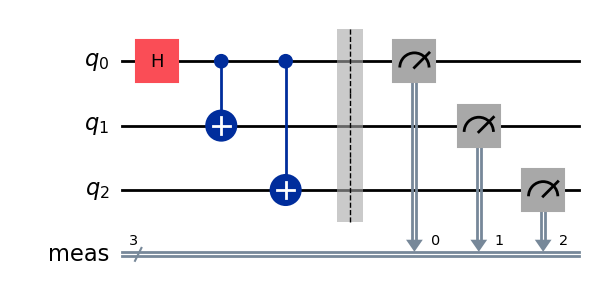

In [2]:
circ = QuantumCircuit(3)

circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)

circ.measure_all()
circ.draw('mpl')

c:\Users\Lowkey\Documents\Code\QuantumSetup.git\.venv\Lib\site-packages\qiskit_braket_provider\providers\adapter.py:457: UserWarning: The Qiskit circuit contains barrier instructions that are ignored.
  warnings.warn(


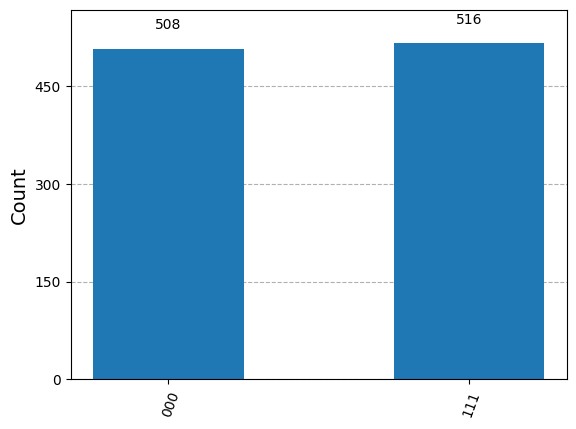

In [3]:
# https://github.com/UST-QuAntiL/qiskit-service/blob/edc8f3b13b08a4d4d880a121b05566a01257aefe/app/aws_handler.py#L19
qc_compiled = transpile(circ, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts()

plot_histogram(counts)